In [4]:
from simulator import TinySimulator, MainSimulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json

In [166]:
simulator = MainSimulator()

In [167]:
no_mutation_rates = {
    "size": 0,
    "speed": 0,
    "vision": 0,
    "aggression": 0,
}

low_mutation_rates = {
    "size": 0.01,
    "speed": 0.01,
    "vision": 0.01,
    "aggression": 0.01,
}

high_mutation_rates = {
    "size": 0.1,
    "speed": 0.1,
    "vision": 0.1,
    "aggression": 0.1,
}

mutation_rates_list = [no_mutation_rates, low_mutation_rates,
                   high_mutation_rates]

mutation_rates_labels = ["No Mutation Rate", "Low Mutation Rate", "High Mutation Rate"]

In [168]:
num_iters = 30

data = []

for mutation_rates in mutation_rates_list:
    log_list = []
    for i in range(num_iters):
        days_survived, log = simulator.run(mutation_rates)
        log_list.append(log)
    data.append(log_list)

: 

In [ ]:
def get_populations_from_log(log): 
  populations = [] 

  for log_item in log: 
    populations.append(log_item.num_species_alive)
  
  return populations

In [ ]:
def arrays_from_log_list(log_list):
  populations = [get_populations_from_log(log) for log in log_list]
  max_length = max(map(len, populations))
  population_arr = np.zeros((len(populations), max_length), dtype=int)

  for i, row in enumerate(populations):
      population_arr[i, :len(row)] = row

  x = np.arange(1, max_length + 1)

  y = population_arr
  y_mean = np.mean(y, axis=0)
  y_std = np.std(y, axis=0)
  y_std_above = y_mean + y_std 
  y_std_below = np.clip(y_mean - y_std, a_min=0, a_max=None)

  return x, y_mean, y_std_above, y_std_below, populations

In [1]:
def convert_to_list_data_form(arrays):
    x, y_mean, y_std_above, y_std_below, populations = arrays
    return list(x), list(y_mean), list(y_std_above), list(y_std_below), list(populations)


def convert(obj):
    if isinstance(obj, np.int64):
        return int(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        raise TypeError("Type not serializable")


stored_data = [convert_to_list_data_form(
    arrays_from_log_list(log_list)) for log_list in data]

file_path = "data.json"

with open(file_path, 'w') as json_file:
    json.dump(stored_data, json_file, default=convert)

NameError: name 'data' is not defined

In [2]:
with open(file_path, 'r') as json_file:
    loaded_data = json.load(json_file)

data = loaded_data 

NameError: name 'file_path' is not defined

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)

tableau_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for index, data_item in enumerate(data): 
  x, y_mean, y_std_above, y_std_below, _ = data_item

  ax.plot(x, y_mean, color=tableau_colors[index], label=mutation_rates_labels[index])
  ax.fill_between(x, y_std_above, y_std_below, color=tableau_colors[index], alpha=0.2)

ax.legend()

NameError: name 'plt' is not defined

In [ ]:
def surivial_times_from_log_list(data_item):
  _, _, _, _, populations = data_item
  surivial_times = np.array([len(population) for population in populations])
  return surivial_times

y = []

for data_item in data: 
  surivial_times = surivial_times_from_log_list(data_item)
  y.append(surivial_times)

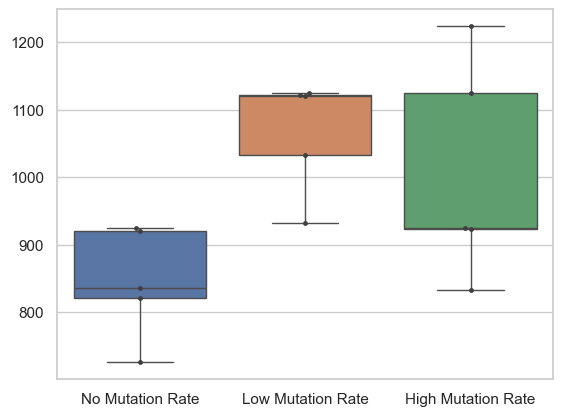

In [ ]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

sns_data = {mutation_rates_labels[i]: y[i] for i in range(3)}

df = pd.DataFrame(sns_data)
ax = sns.boxplot(data=df, showfliers=False, palette=tableau_colors[:len(y)])
ax = sns.swarmplot(data=df, color=".25", size=3.5)
plt.show()